<a href="https://colab.research.google.com/github/aneekbsws/deeplearning/blob/main/log_reg_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the datasets

In [ ]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

In [ ]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
# Loading the data (cat/non-cat)
train_set_x_orig, y_train, test_set_x_orig, y_test, classes = load_dataset()

In [ ]:
# # Example of a picture
# index = 25
# plt.imshow(train_set_x_orig[index])
# print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [ ]:
# Test set details
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
print(m_train)
print(m_test)
print(num_px)
print(train_set_x_orig.shape)

209
50
64
(209, 64, 64, 3)


In [ ]:
# Reshaping the sets - Originally it is (m, nx, nx, 3). Now it'll be ((nx*nx*3),m)
x_train_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
x_test_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

In [ ]:
print(x_train_flatten.shape) 
print(x_test_flatten.shape)

(12288, 209)
(12288, 50)


In [ ]:
# Standardising (dividing by 255 - max value of pixel channel)
x_train = x_train_flatten/255
x_test = x_test_flatten/255

# Building parts of algorithm

In [ ]:
# HELPER Functions
def sigmoid(z):
  s = 1/(1+np.exp(-z))
  return s

In [ ]:
def init_zeros(dimens):
  w = np.zeros((dimens,1))
  b = 0.0
  return w,b

# Propagation Methods

In [ ]:
def propagate(w,b,X,Y):
  # Forward propagate
  m = X.shape[1]
  A = sigmoid(np.dot(w.T,X)+b)
  first_term = Y*np.log(A)
  sec_term = (1-Y)*np.log(1-A)
  J = (-1/m)*np.sum(first_term + sec_term)

  #back-propagate
  dw = (1/m)*(np.dot(X,(A-Y).T))
  db = (1/m)*np.sum((A-Y))
  J = np.squeeze(np.array(J))
  grads = {"dw": dw, "db":db}
  return J, grads

In [ ]:
def optimize(w,b,X,Y,num_itr, learning_rate, print_cost):
  w = copy.deepcopy(w)
  b = copy.deepcopy(b)
  costs = []
  for i in range(num_itr):
    cost, grad = propagate(w,b,X,Y)
    dw = grad["dw"]
    db = grad["db"]
    w = w - (learning_rate*dw)
    b = b - (learning_rate*db)
    if(i%100==0):
      costs.append(cost)
      if(print_cost == True):
        print("Cost after iteration %i : %f" %(i, cost))
  params = {"w":w,"b":b}
  return costs,params,grad

In [ ]:
def predict(w,b,X):
  m = X.shape[1]
  Y_prediction = np.zeros((1,m))
  w = w.reshape(X.shape[0],1)
  A = sigmoid(np.dot(w.T,X)+b)
  for i in range(A.shape[1]):
    if(A[0,i] > 0.5):
      Y_prediction[0,i] = 1
    else:
      Y_prediction[0,i] = 0
  return Y_prediction

# Final Model Function

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_code):
  w,b = init_zeros(X_train.shape[0])
  costs, param, grad = optimize(w,b,X_train,Y_train, num_iterations, learning_rate, print_code)
  w = param["w"]
  b = param["b"]
  Y_prediction_train = predict(w,b,X_train)
  Y_prediction_test = predict(w,b,X_test)
  if print_code:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
  d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
  return d

In [ ]:
logistic_regression_model = model(x_train, y_train , x_test, y_test, num_iterations=2000, learning_rate=0.005, print_code=True)

Cost after iteration 0 : 0.693147
Cost after iteration 100 : 0.584508
Cost after iteration 200 : 0.466949
Cost after iteration 300 : 0.376007
Cost after iteration 400 : 0.331463
Cost after iteration 500 : 0.303273
Cost after iteration 600 : 0.279880
Cost after iteration 700 : 0.260042
Cost after iteration 800 : 0.242941
Cost after iteration 900 : 0.228004
Cost after iteration 1000 : 0.214820
Cost after iteration 1100 : 0.203078
Cost after iteration 1200 : 0.192544
Cost after iteration 1300 : 0.183033
Cost after iteration 1400 : 0.174399
Cost after iteration 1500 : 0.166521
Cost after iteration 1600 : 0.159305
Cost after iteration 1700 : 0.152667
Cost after iteration 1800 : 0.146542
Cost after iteration 1900 : 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 1, you predicted that it is a "cat" picture.


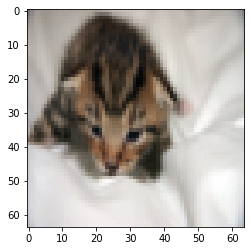

In [ ]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(x_test[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(y_test[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

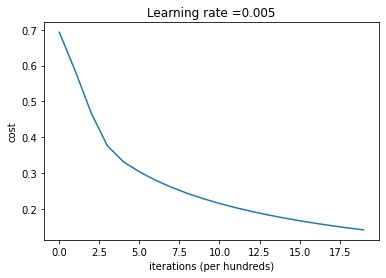

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

y = 1.0, your algorithm predicts a "cat" picture.


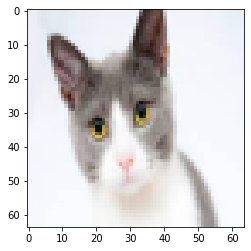

In [ ]:
# change this to the name of your image file
my_image = "cat.jpg"   

# We preprocess the image to fit your algorithm.
fname =  my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")